In [1]:
import sys
if '../' not in sys.path: sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 2

from optimizers_2 import *

import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
opt_names = ['GD', 'Momentum', 'NAG', 'Adagrad', 'RMSprop', 'Adadelta','Adam']

In [4]:
params_ = {
    'GD': { 'eta': .01 },
    'Momentum': { 'eta': .01, 'gamma': .9 },
    'NAG': { 'eta': .01, 'gamma': .9 },
    'Adagrad': { 'eta': .1, 'eps': 1e-4 },
    'RMSprop': { 'eta': .1, 'gamma': .9, 'eps': 1e-4 },
    'Adadelta': { 'gamma': .9, 'eps': 1e-4 },
    'Adam': { 'eta': .1, 'beta1': .9, 'beta2': .999, 'eps': 1e-4 }
}

In [5]:
def get_trace(theta, name, J, J_grad, params_, steps):
    params = params_[name]
    
    trace = [np.hstack((theta, J(theta)))]

    for i in range(steps):
        theta, params = step(theta=theta, grad=J_grad, name=name, state=params)
        try:
            trace.append(np.hstack((theta, J(theta))))
        except ValueError:
            print theta
            raise ValueError
    
    return np.asarray(trace)

## Example 1

In [6]:
J = lambda x: x[0] ** 2 - x[1] ** 2
J_grad = lambda x: np.asarray([2 * x[0], -2 * x[1]])

In [7]:
x_ = np.linspace(-2, 2, 100)
y_ = np.linspace(-2, 2, 100)
xv, yv = np.meshgrid(x_, y_)

zv = np.asarray([[J([x, y]) for x in x_] for y in y_])

In [8]:
traces = {}
for name in opt_names:
    traces[name] = get_trace(np.asarray([1.0, 1e-8]), name, J, J_grad, params_, 50)

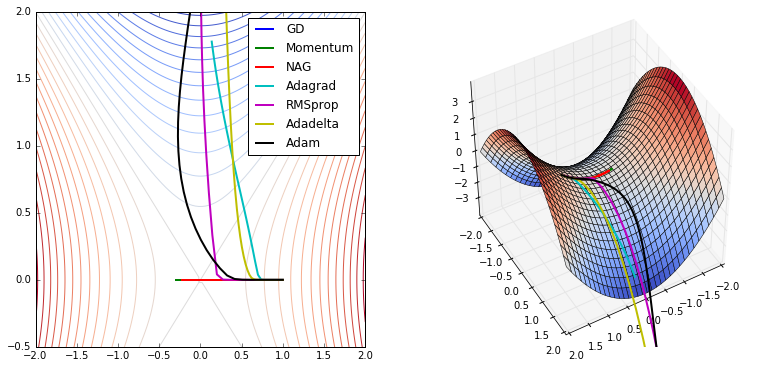

In [9]:
fig = plt.figure(figsize=(13, 6))

ax = fig.add_subplot(1, 2, 1)
ax.set_xlim([-2, 2])
ax.set_ylim([-.5, 2])
ax.contour(xv, yv, zv, 30, cmap=cm.coolwarm)
for name in opt_names:
    ax.plot(traces[name][:,0], traces[name][:,1], linewidth=2, label=name)
ax.legend(loc='best')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.view_init(45, 60)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([np.min(zv), np.max(zv)])
ax.plot_surface(xv, yv, zv, rstride=3, cstride=3, linewidth=.5, cmap=cm.coolwarm)
for name in opt_names:
    ax.plot(traces[name][:,0], traces[name][:,1], traces[name][:,2], linewidth=2, label=name)

## Example 2

In [10]:
J = lambda x: x[0] ** 2 + x[1] ** 2
J_grad = lambda x: np.asarray([2 * x[0], 2 * x[1]])

In [11]:
x_ = np.linspace(-2, 2, 100)
y_ = np.linspace(-2, 2, 100)
xv, yv = np.meshgrid(x_, y_)

zv = np.asarray([[J([x, y]) for x in x_] for y in y_])

In [12]:
traces = {}
for name in opt_names:
    traces[name] = get_trace(np.asarray([1.0, -1.0]), name, J, J_grad, params_, 50)

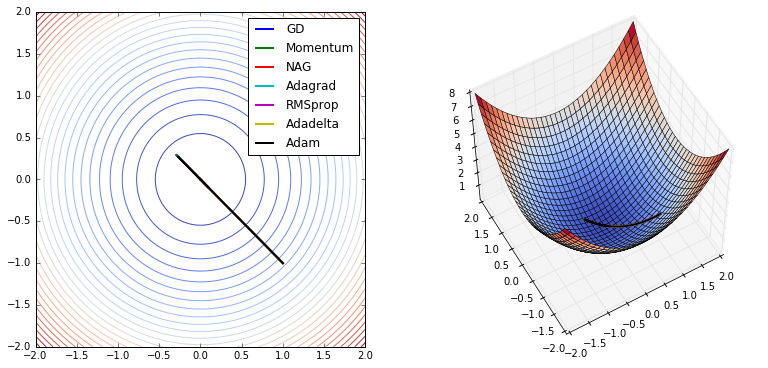

In [13]:
fig = plt.figure(figsize=(13, 6))

ax = fig.add_subplot(1, 2, 1)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.contour(xv, yv, zv, 30, cmap=cm.coolwarm)
for name in opt_names:
    ax.plot(traces[name][:,0], traces[name][:,1], linewidth=2, label=name)
ax.legend(loc='best')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.view_init(55, 180+60)
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([np.min(zv), np.max(zv)])
ax.plot_surface(xv, yv, zv, rstride=3, cstride=3, linewidth=.5, cmap=cm.coolwarm)
for name in opt_names:
    ax.plot(traces[name][:,0], traces[name][:,1], traces[name][:,2], linewidth=2, label=name)

## Example 3

In [14]:
from math import sin, cos

In [15]:
J = lambda x: x[0] ** 2 * sin(x[0]) + x[1] ** 2 * sin(x[1])
J_grad = lambda x: np.asarray([
        x[0] * (x[0] * cos(x[0]) + 2.0 * sin(x[0])),
        x[1] * (x[1] * cos(x[1]) + 2.0 * sin(x[1]))
    ])

In [16]:
x_ = np.linspace(-6, 6, 200)
y_ = np.linspace(-6, 6, 200)
xv, yv = np.meshgrid(x_, y_)

zv = np.asarray([[J([x, y]) for x in x_] for y in y_])

In [17]:
traces = {}
for name in opt_names:
    traces[name] = get_trace(np.asarray([.5, 1.5]), name, J, J_grad, params_, 150)

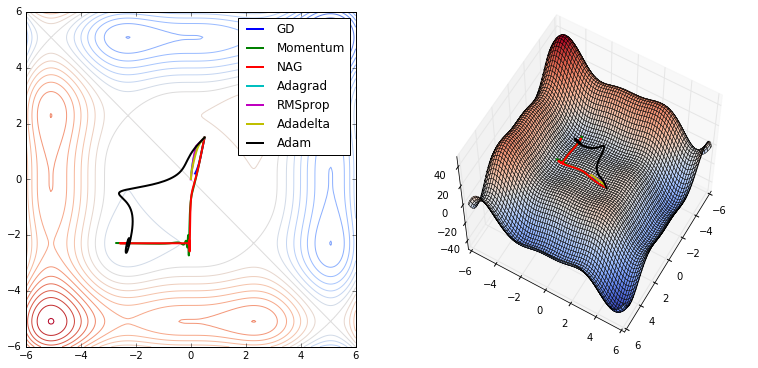

In [18]:
fig = plt.figure(figsize=(13, 6))

ax = fig.add_subplot(1, 2, 1)
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.contour(xv, yv, zv, 30, cmap=cm.coolwarm)
for name in opt_names:
    ax.plot(traces[name][:,0], traces[name][:,1], linewidth=2, label=name)
ax.legend(loc='best')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.view_init(60, 30)
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.set_zlim([np.min(zv), np.max(zv)])
ax.plot_surface(xv, yv, zv, rstride=3, cstride=3, linewidth=.5, cmap=cm.coolwarm)
for name in opt_names:
    ax.plot(traces[name][:,0], traces[name][:,1], traces[name][:,2], linewidth=2, label=name)

In [19]:
traces = {}
for name in opt_names:
    traces[name] = get_trace(np.asarray([-4, -4.5]), name, J, J_grad, params_, 50)

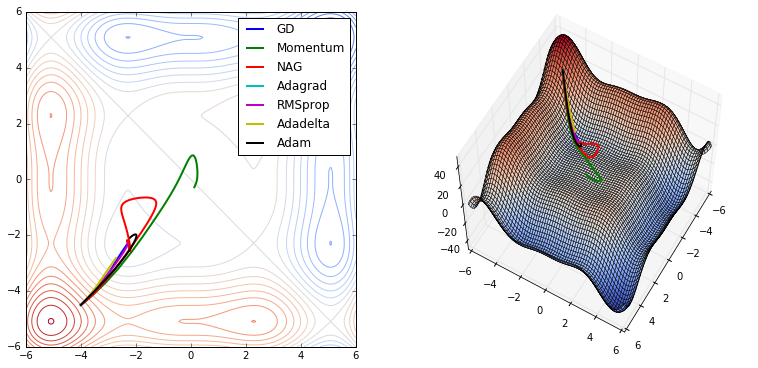

In [20]:
fig = plt.figure(figsize=(13, 6))

ax = fig.add_subplot(1, 2, 1)
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.contour(xv, yv, zv, 30, cmap=cm.coolwarm)
for name in opt_names:
    ax.plot(traces[name][:,0], traces[name][:,1], linewidth=2, label=name)
ax.legend(loc='best')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.view_init(60, 30)
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.set_zlim([np.min(zv), np.max(zv)])
ax.plot_surface(xv, yv, zv, rstride=3, cstride=3, linewidth=.5, cmap=cm.coolwarm)
for name in opt_names:
    ax.plot(traces[name][:,0], traces[name][:,1], traces[name][:,2], linewidth=2, label=name)

In [21]:
traces = {}
for name in opt_names:
    traces[name] = get_trace(np.asarray([4, 1]), name, J, J_grad, params_, 50)

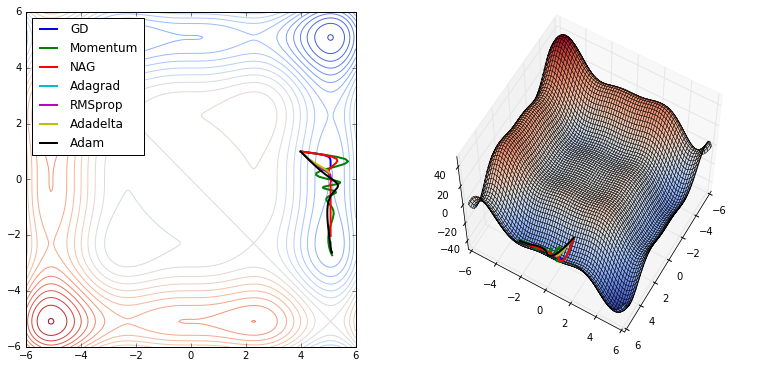

In [22]:
fig = plt.figure(figsize=(13, 6))

ax = fig.add_subplot(1, 2, 1)
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.contour(xv, yv, zv, 30, cmap=cm.coolwarm)
for name in opt_names:
    ax.plot(traces[name][:,0], traces[name][:,1], linewidth=2, label=name)
ax.legend(loc='best')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.view_init(60, 30)
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.set_zlim([np.min(zv), np.max(zv)])
ax.plot_surface(xv, yv, zv, rstride=3, cstride=3, linewidth=.5, cmap=cm.coolwarm)
for name in opt_names:
    ax.plot(traces[name][:,0], traces[name][:,1], traces[name][:,2], linewidth=2, label=name)

## Example 4

In [23]:
params_ = {
    'GD': { 'eta': .01 },
    'Momentum': { 'eta': .01, 'gamma': .9 },
    'NAG': { 'eta': .01, 'gamma': .4 },
    'Adagrad': { 'eta': .1, 'eps': 1e-4 },
    'RMSprop': { 'eta': .1, 'gamma': .9, 'eps': 1e-4 },
    'Adadelta': { 'gamma': .9, 'eps': 1e-4 },
    'Adam': { 'eta': .1, 'beta1': .9, 'beta2': .999, 'eps': 1e-4 }
}

In [24]:
J = lambda x: x[0] ** 2 * sin(x[0] ** 2) + x[1] ** 2 * sin(x[1] ** 2)
J_grad = lambda x: np.asarray([
        2.0 * x[0] * (x[0] ** 2.0 * cos(x[0] ** 2) + sin(x[0] ** 2)),
        2.0 * x[1] * (x[1] ** 2.0 * cos(x[1] ** 2) + sin(x[1] ** 2))
    ])

In [25]:
x_ = np.linspace(-6, 6, 200)
y_ = np.linspace(-6, 6, 200)
xv, yv = np.meshgrid(x_, y_)

zv = np.asarray([[J([x, y]) for x in x_] for y in y_])

In [32]:
traces = {}
for name in opt_names:
    traces[name] = get_trace(np.asarray([-2.5, 1]), name, J, J_grad, params_, 10)

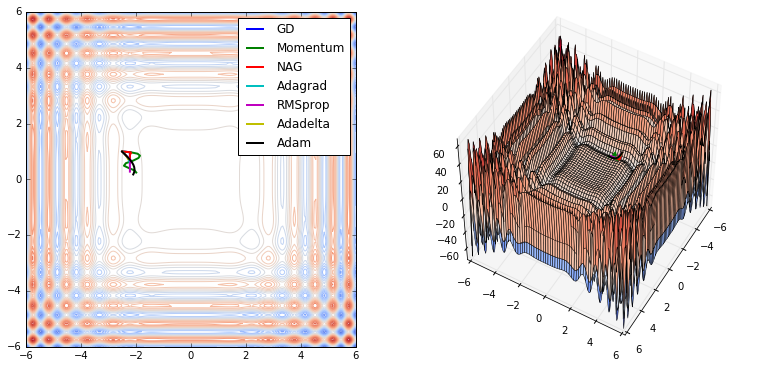

In [33]:
fig = plt.figure(figsize=(13, 6))

ax = fig.add_subplot(1, 2, 1)
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.contour(xv, yv, zv, 30, cmap=cm.coolwarm)
for name in opt_names:
    ax.plot(traces[name][:,0], traces[name][:,1], linewidth=2, label=name)
ax.legend(loc='best')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.view_init(50, 30)
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])
ax.set_zlim([np.min(zv), np.max(zv)])
ax.plot_surface(xv, yv, zv, rstride=3, cstride=3, linewidth=.5, cmap=cm.coolwarm)
for name in opt_names:
    ax.plot(traces[name][:,0], traces[name][:,1], traces[name][:,2], linewidth=2, label=name)